In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import LMSC_optimize
from visualizingData import *
import pandas as pd
import os
import ast

In [2]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [3]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

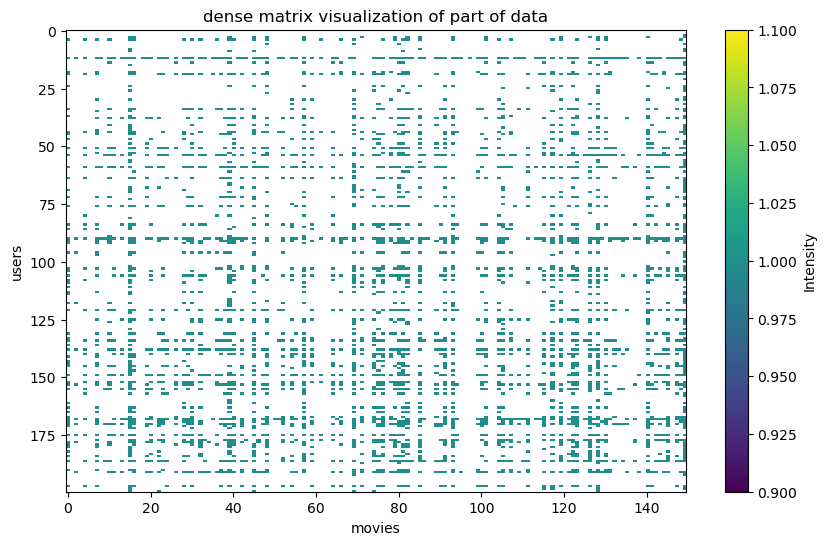

In [4]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [5]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization

# Generate rhos for each lambda
rhos = np.round(10*np.arange(.1,1.5, .1))/10

# List to store results
results = []




In [6]:

    
# Iterate over rho values
for rho in rhos: 
    # Iterate over lambda values
    for lambda_ in lambdas:
        # Iterate over gamma values
        
        for gamma in gammas:
            # Calculate epsilon based on matrix size and gamma
            epsilon = m * n * gamma  # Error threshold as defined in the paper
            
            # Print current parameter settings
            print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

            # Run the optimization function with the current parameters
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors, rank = LMSC_optimize(
                rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations
            )
            
            print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}; r{rank}\n")
            # Store the results in a dictionary
            result = {
                'lambda': lambda_,
                'rho': rho,
                'gamma': gamma,
                'errors': errors,
                'relative_errors': r_errors,
                'rank': rank
            }
            results.append(result)


Current settings: gamma = 0.0, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.1, lambda = 0.1; r98

Current settings: gamma = 0.001, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.1, lambda = 0.1; r96

Current settings: gamma = 0.01, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.1, lambda = 0.1; r84

Current settings: gamma = 0.0, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.1, lambda = 0.2; r101

Current settings: gamma = 0.001, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.1, lambda = 0.2; r101

Current settings: gamma = 0.01, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.1, lambda = 0.2; r82

Current settings: gamma = 0.0, rho = 0.1, lambda = 0.3
I

In [ ]:
# Assuming 'results' is the list you populated with dictionaries as shown earlier
results_df = pd.DataFrame(results)  # Convert the results list to a DataFrame

# Define the directory name
directory = 'lsmc_validation'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the DataFrame
file_path = os.path.join(directory, 'validationv1.csv')

# Save the DataFrame as a CSV file
results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Results saved to lsmc_validation\validationv1.csv


In [8]:


# Define the directory and file path
directory = 'lsmc_validation'
file_path = os.path.join(directory, 'validationv1.csv')

# Load the DataFrame from the CSV file
results_df = pd.read_csv(file_path)

# Display the loaded DataFrame
print(results_df.head())  # Show the first few rows of the DataFrame


   lambda  rho  gamma                                             errors  \
0     0.1  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
1     0.1  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   
2     0.1  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [2....   
3     0.2  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
4     0.2  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   

                                     relative_errors  rank  
0  [(3.8917355476968214, 1.9329862697031648, 5.82...    98  
1  [(3.8917355476968214, 1.9329862697031648, 5.82...    96  
2  [(3.8917355476968214, 1.9329862697031648, 5.82...    84  
3  [(3.8917355476968214, 1.9329862697031648, 5.82...   101  
4  [(3.8917355476968214, 1.9329862697031648, 5.82...   101  


In [ ]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return U@ S @ V

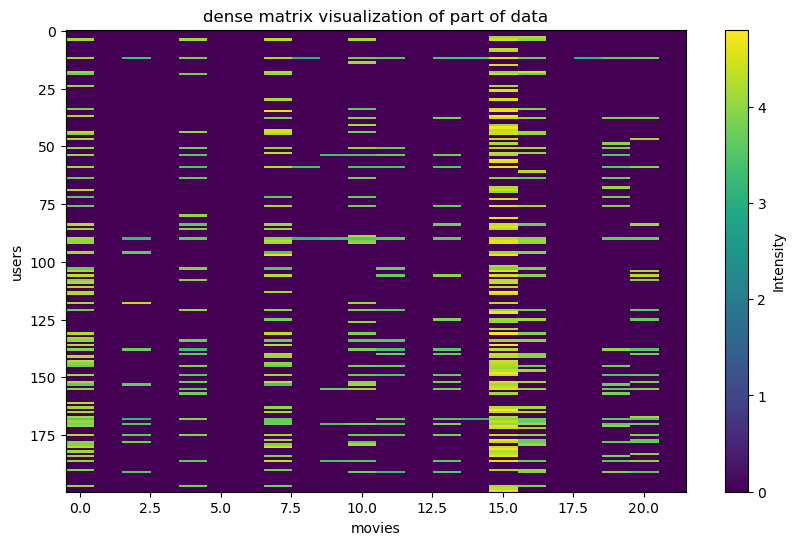

In [15]:
visualizeData(dense_matrix[:,:22])

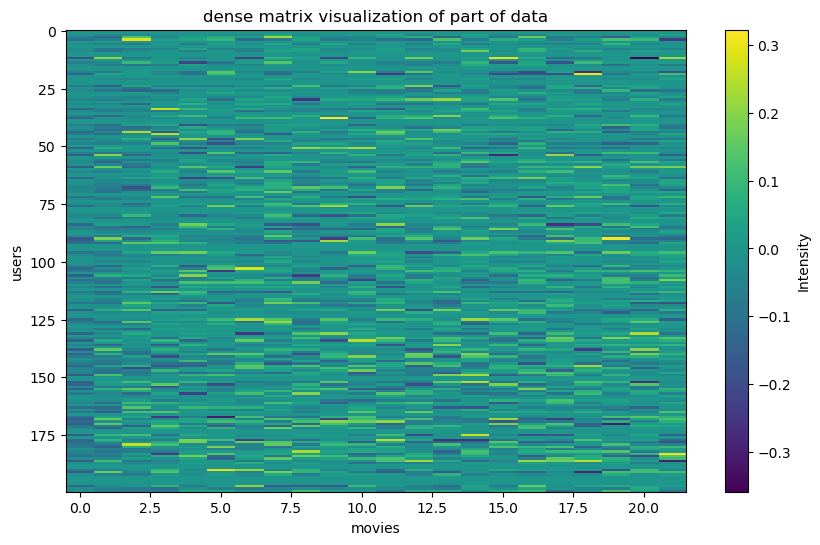

In [12]:
visualizeData(SVD_truncated(dense_matrix, 22)[0])